# Comparaison d'architectures de réseaux de neurones convolutifs

Table des matières : 

0. [Préparation de l'environnement de travail](#sec0)
1. [Rappels sur les réseaux de neurones convolutifs](#sec1)
2. [Construction et étude d'une architecture basique de CNN](#sec2)  
3. [Etude d'architectures de CNN classiques](#sec3)
4. [Comparaison de la performance des architectures](#sec4)
5. [Références bibliographiques](#sec5)


# <a id="sec0">0. Préparation de l'environnement de travail</a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import netron as nt 

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.nasnet import preprocess_input, decode_predictions

from tensorflow.keras.preprocessing import image
from google.colab import files

# <a id="sec1">1. Rappels sur les réseaux de neurones convolutifs</a>

# Introduction

-Les Réseaux de Neurones Convolutifs ou CNN (Convolutional Neural Networks)    sont une catégorie de réseaux de neurones utilisés principalement dans le domaine de la vision par ordinateur. Les application possibles des CNN sont par exemple la reconnaissance faciale, la détection d'objets ou bien la classification d'images. 

Le fonctionnement global de ces réseaux de neurones ne diffère pas fondamentalement du fonctionnement d'un réseau de neurones classique. La principale différence se fait au niveau de l'Input.<br> 
Pour les réseaux de neurones classiques, on considère que l'entrée est un vecteur de données.
Ici on fait l'hypothèse que l'entrée est une image.<br> On aura donc ici une entrée matricielle de dimensions h (Hauteur), w (Largeur) et d (Profondeur).
- h et w correspondent à la dimension de l'image en pixels.<br>
- d vaut 1 si l'image est en gris et 3 si l'image est en couleur car il y a 3 canaux (R G et B) différents.  
- Les valeurs de cette matrice représentent les valeurs de chaque pixel pour le différents canaux de couleurs.

# Couches utilisées dans la construction des CNN : 

# 1) La couche convolutive : 
Notée CONV, cette couche effectue l'opération de convolution sur l'image en entrée. Dans Cette couche, on définit un nombre donnée de filtres convolutifs à appliquer. Chaque filtre applique un produit scalaire, qui sera ici en 3 dimensions, ou 3 produits scalaires sur chaque canal bidimensionnel qu'on va sommer par la suite. Chaque filtre aura ses propres poids, auquels on rajoute un biais.


Un filtre convolutif sera défini par les paramètres suivants : 
- Les dimensions du filtre h et w.<br> En général h=w et la dimension est assez petite de l'ordre de 3 
- Le pas S (stride en anglais) qui spécifie la taille de déplacement du filtre 
- Le Zero Padding Z . C'est une variable qui spécifie le rajout de Z couches de 0 sur les bords afin qu'on puisse appliquer les filtres sur les valeurs limites bords de l'image et les prendre en compte. Sans cela on reduit nécessairement la dimension


# Relation entre les dimensions d'entrée et de sortie : 


Si l'on note $W_{in}$  la dimension de l'input $F$ la dimension du filtre $S$ le pas, $P$ la taille du Zero Padding et $W_{out}$ .<br>
On aura alors la relation : $$W_{out} = (W_{in}-F+2*P)/S +1 $$ 



On suppose ici que la hauteur est égale à la largeur et donc on prend seulement qu'une composante de la dimension.

Il est important d'ajouter que $(W_{in}-F+2*P)/S $ soit un entier. Le cas écheant on aura une erreur puisqu'on va obtenir des lignes de tailles variables. Dans ce cas les modules peuvent proposer automatiquement du Zero Padding pour régler le problème ou alors envoyer un message d'erreur.  

# Exemples visuels d'opérations de convolution

<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/conv2d.gif?raw=1"> 

Ici on peut voir un filtre convolutif de dimension (3x3x3) appliqué à une image de taille 7x7 pixels. Dans ce cas on va avoir deux filtres convolutifs W0 et W1.<br>
On peut remarquer qu'on vérifie bien la relation entre la dimension de l'entrée et de sortie car on a $W_{in} = 5$, $F=3$, $S=2$, $P=1$ et on a bien 
$W_{out} = (5-3+2)/2 + 1 = 3 $.

Voici ce qu'on verra en 3D

<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/convnet.gif?raw=1">

ici Les deux filtres qu'on applique $F_1$ et $F_2$ ont pour dimension repsectives $W_1$ et $W_2$ [4,4,3]

# Avantages de cette couche 

Le principal avantage des couches convolutives provient de l'utilisation de ces filtres qui ont un nombre de paramètres bien réduit. 
Par exemple, sur une image en couleurs de taille 500x500x3 pixels en utilisant une couche classique de neurones entièrement connectés chaque neuron de la couche suivante aurait 750,000 poids. On aurait alors trop de données ce qui menerait vers un phénomèbe de surapprentissage.<br>
Cependant, si on utilise un filtre convolutif les neurones de l'espace suivant seront dépendront seulement des coefficients de chaque filtre ce qui permet de réduire grandement le nombre de paramètres.<br>
Le filtre aura tendance, au fur et à mesure des entrainements, de reconnaître certains motifs et adapter ses poids au fur et à mesure. 

# 2) La couche de Pooling

La couche de Pooling ,qui s'insère en générale entre deux couches convolutives, permet de compresser l'information et réduit le nombre des paramètres utilisés dans le réseau, ce qui permet de limiter les phénomènes de surapprentissage. 

On applique un filtre, en général de faible dimension (pour ne pas trop réduire la dimensionalité du problème) de manière similaire qu'avec le filtre convolutif. Cette fois ci on va appliquer une fonction comme MAX AVG ou L2-NORM
dans une petite zone de l'espace.


<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/Max_pooling.png?raw=1">

Cette couche va dépendre de deux hyperparamètres :
- La dimensionalité $F$ du filtre 
- Le pas $S$ du filtre 

Il y a également différents types d'opérateur parmi lesquels on peut choisir : 
- MAX, prend la valeur maximale.
- AVG, prend la valeur moyenne.
- L2-Norm prend la norme 2 des cellules séléectionnées par le filtre.

En pratique l'opérateur le plus utilisé est MAX 

On peut aussi définir une relation entre les dimensions de l'entrée et de la sortie : <br> 
Soient $W_{in}$ la dimension de l'entrée du filtre, $F$ la dimension du filtre et $S$ la taille du déplacement du filtre. <br>
La dimension $W_{out}$ de sortie sera alors égale à : $$W_{out} = (W_{in}-F)/S+1 $$

# 3) Autres couches utilisées :

# Couche entièrement connectée 

Il s'agit de la couche classique utilisée dans le réseaux de neurones dans laquelle chaque neuron est connecté à tous les neurons de la couche précédente.


<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/FC_layer.png?raw=1">

# Couche de correction 

Dans cette couche on applique une fonction d'activation terme-à-terme. Les fonctions d'activations sont par exemple : 
- La fonction  ReLu : $ReLu(x) = max(0,x)$


In [ ]:
def ReLu(x):
  return max(0,x)

In [ ]:
x = np.linspace(-5,5,100)

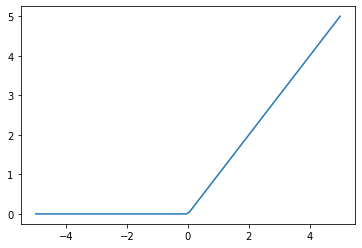

In [ ]:
fig, ax = plt.subplots()
y = [ReLu(k) for k in x]
ax.plot(x,y)

- La fonction tangente hyperbolique :  $tanh(x)$


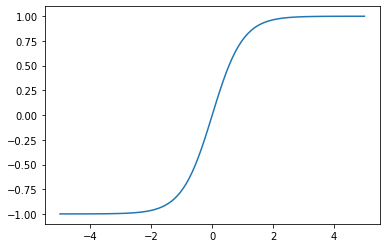

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,np.tanh(x))

- La fonction sigmoïde : $f(x) = 1/(1+e^{-x})$

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

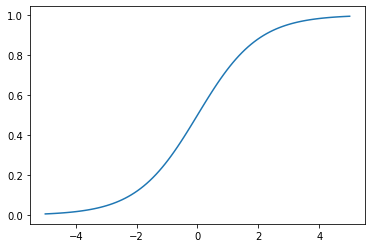

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,sigmoid(x))

Cette couche permet de favoriser la non linéarité du réseau. 

# <a id="sec2">2. Construction et étude d'une architecture basique de CNN</a>

# Architectures des réseaux de neurones convolutifs : 

On a donc vu, dans la partie précedente, que les réseaux de neurones convolutifs utilisent principalement 3 types de couches principales :
- CONV, la couche convolutive.
- POOL, la couche de pooling.
- FC, la couche entièrement connectée. 
- ReLu, la couche de correction.

Dans une architecture de CNN, on aura tendance à combiner ces couches en suivant un motif bien précis que l'on va adapter selon les besoins de notre architecture.<br>

[1] Propose le motif le plus courrament utilisé :<br> 
$INPUT -> [[CONV -> RELU]*N -> POOL?]*M -> [FC -> RELU]*K -> FC $


On va donc, à la suite de notre couche initiale qui contient l'entrée, superposer $M$ structures succéssives. Dans chacune de ces structures on aura une couche convolutive suivie d'une couche de correction utilisant la fonction ReLu.<br> Ces deux couches vont elles mêmes se répeter $N$ fois.<br>
Ensuite on peut éventuellement rajouter une couche de pooling pour réduire la dimensionnalité de notre structure.<br>
On va alors utiliser $K$ fois une structure contenant une couche entièrement connectée suivie d'une correction.<br>
Enfin, on connectera le résultat de cette succéssion de couche à une couche FC finale qui représente notre sortie. 

<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/convnet_ex.jpeg?raw=1">

Dans cet exemple on observe que l'architecture du réseau de neurones convolutif suit le motif proposé ci-dessus avec $N = 2$, $M = 3$ et $K = 0$

Il est préferable de superposer plusieurs couches de convolution avec des filtres de petite dimension plutôt que d'utiliser une seul couche avec des filtres de grande dimension.
<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/conv_successive.PNG?raw=1">

Pour illustrer ce résultat, prenons 2 couches convolutives succéssives.<br> On supposera que chaque couche aura $C$ Canaux différents dans le cas où $F = 7$ on aura alors $ C*(7*7*C) = 49*C^2$ paramètres pour cette couche tandis qu'avec 3 couches superposées on aura $ 3*C*(3*3*C)= 27*C^2$ on aura donc moins de paramètres à conserver.<br>
Les neurones de la troisième couche dépenderont spatialement des 7x7 neurones
qui les entourent (3x3, puis 5x5, puis 7x7, par transitivité) tout comme dans le cas où l'on applique une seule couche convolutive.<br>


On aura donc autant d'information mais sans avoir autant de paramètres. 
<br>
Un inconvenient viendrait du fait qu'on doit conserver en mémoire plus de neurones dans les couches intérmediaires lors de l'entrainement du modèle.

# Dimensionnement des couches :


En général, il est préferable que la couche d'entrée, qui contient l'image, ait une dimension qui soit divisible plusieurs fois par 2. <br>
Par exemple 32 pixels (taille des images CIFAR 10), 224 pixels (taille des images ImageNet) sont des valeurs plausibles. Ceci permet d'ajouter plusieurs couches successives de pooling.




Dans les couches convolutives, il est préferable d'utiliser des filtres relativement petits  (3x3 ou 5x5) et un pas $S$ unitaire. Dans ce cas, pour conserver la dimension entre les couches convolutives succéssives il est nécessaire de rajouter du Zero Padding $P$ tel que $P = (F-1)/2$ avec $F$ la dimension du filtre.  

Pour les couches de pooling il est courant d'utiliser un filtre de taille $F = 2$ et un pas $S = 2$. <br> Ainsi, on réduit de 75% l'information contenue. Un pooling avec un filtre de dimension supérieure  menerait à une perte trop grande de l'information et diminuerait la performance du réseau. 

# Exemple applicatif : Construction d'une architecture basique de réseau de neurones convolutif

Dans cette partie nous allons nous intéresser à la construction d'un tel réseau de neurones ainsi qu'à l'étude de son architecture.

# 1) Jeu de données utilisé 

Dans cet exemple nous allons utiliser le jeu de données CIFAR 10 (Canadian Insitute For Advanced Research). <br>
Ce jeu de données contient 60,000 Photos en couleur de taille 32x32. <br>
Ce jeu de données contient 10 classes différentes et chaque photo est associé à un label parmi ces 10 classes. 

Nous allons d'abord charger ce jeu de données qui est disponible directement depuis l'API de Keras, le module python qui nous servira pour créer notre réseau de neurones convolutif, l'entrainer et étudier ses performances.  

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# On normalise la valeur des pixels entre 0 et 1
train_images, test_images = train_images / 255.0, test_images / 255.0

On sépare ici notre jeu de données, on disposera de 50,000 paires $(image,label)$ pour l'entrainement et de 10000 paires restantes pour tester notre réseau. 

In [ ]:
print("Train images length : {} \nTest images length : {}".format(len(train_images),len(test_images)))

Train images length : 50000 
Test images length : 10000


On peut vérifier la dimension des images :

In [ ]:
print("The dimension of the images are {}".format(train_images[0].shape))

The dimension of the images are (32, 32, 3)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

On va ensuite représenter certaines images 

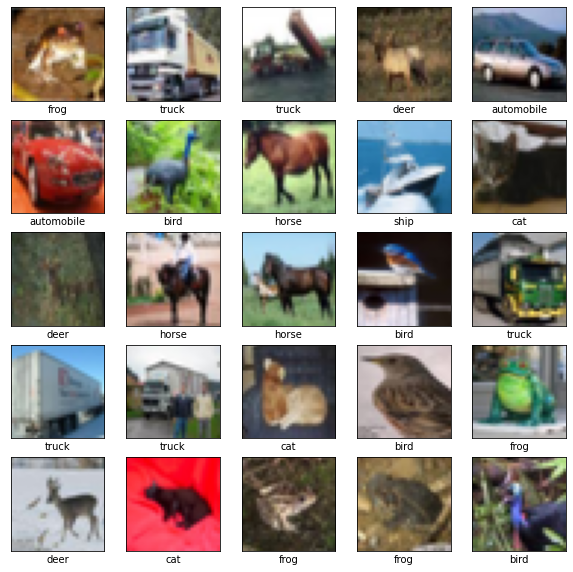

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# 2) Définition des différentes couches de notre architecture :

On va définir ici les couches dont nous aurons besoin pour construire notre réseau de neurones.<br> Pour plus d'information il est possible d'aller sur la documentation de Keras disponible ici : https://keras.io/api/

Pour créer un réseau de neurones il faut tout d'abord initialiser un modèle 

In [ ]:
first_model = models.Sequential()

Cela nous permet de créer une classe dans laquelle nous allons stocker nos couches succéssives.<br> A savoir qu'ici comme on utilise l'oobjet Sequential on doit rajouter de manière succéssive et ordonnée les couches que nous souhaitons utiliser.

# 2.1) La couche CONV :

Pour cette couche nous avons besoin de spécifier plusieur paramètres : 
- Le nombre de filtres que nous voulons utiliser.
- Les dimensions du filtre (en 2D ici).
- Le pas spatial (Stride) qu'utilisera le filtre 
- Le padding, il s'agit ici d'une variable pour indiquer sa présence ou non.



On peut aussi rajouter des paramètres optionnels comme :
- Les dimensions de l'entrée si l'on connecte cette couche à l'entrée. 
- La présence d'une couche de correction en précisant sa fonction d'activation. 

Une liste plus complète de tous les paramètres est disponible sur la page de documentation de Keras. 

In [ ]:
image_shape = (32,32,3)
n_filters = 32 
size_filter = (3,3)
stride = 1
padding = "same"
first_conv2D_layer = layers.Conv2D(n_filters,size_filter,stride,padding,activation='relu',input_shape= image_shape)

On ajoute alors la première couche à notre modèle 

In [ ]:
first_model.add(first_conv2D_layer)

On peut voir les principales caractéristiques de notre réseau grâce à la commande suivante 

In [ ]:
first_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 32, 32, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


La méthode summary nous permet de voir le nombre de paramètres contenus dans notre réseau.<br> Pour le moment nous n'avons qu'assez peu de paramètres car on n'a ajouté qu'une seule couche.


# 2.2) La couche de pooling :

Pour cette couche on aura besoin de spécifier les paramètres suivants : 
- La taille du filtre.
- La taille du pas, si elle n'est pas spécifiée on prend par défaut la taille du filtre.
- La présence de Zero Padding ou non  

In [ ]:
pool_size = (2,2)
first_2DmaxPool_layer = layers.MaxPooling2D(pool_size,padding='valid')

In [ ]:
first_model.add(first_2DmaxPool_layer)

In [ ]:
first_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


Ajoutons ensuite une autre couche convolutive suivie d'une couche de pooling : 

In [ ]:
second_conv_layer = layers.Conv2D(128,(3,3),(1,1),padding="same",activation="relu")

second_pool_layer = layers.MaxPooling2D((2,2),padding='valid')

In [ ]:
first_model.add(second_conv_layer)
first_model.add(second_pool_layer)

On a rajouté ici deux autres couches à notre CNN. <br> Quelle est la dimension de l'output après la deuxième couche de pooling ? 

In [ ]:
#dimensions  =  # A compléter 

# 2.3) Rajout des couches finales pour notre architecture 

Afin d'avoir une sortie convenable, nous allons avoir besoin "d'aplatir" nos données. On va les transformer en un vecteur à une dimension.

On peut faire cela dans Keras en rajoutant une couche supplémentaire nommée Flatten qui va transformer une entrée multidimensionnelle en un vecteur 1D.

In [ ]:
flatten_layer = layers.Flatten()
print("Model output shape before flattening : {}".format(first_model.output_shape))


Model output shape before flattening : (None, 8, 8, 128)


In [ ]:
first_model.add(flatten_layer)
print("Model output shape after flattening : {}".format(first_model.output_shape))

Model output shape after flattening : (None, 8192)


On va rajouter ensuite une couche entièrement connectée grâce à la classe Dense de Keras 

In [ ]:
FC_layer1 = layers.Dense(64,activation = 'relu')
first_model.add(FC_layer1)

Finalement on va rajouter la dernière couche qui correspond à notre sortie. 

In [ ]:
Last_layer = layers.Dense(10)
first_model.add(Last_layer)

On a donc défini entièrement notre premier réseau de neurones convolutif ! 

Observons maintenant l'ensemble de ses caractéristiques : 

In [ ]:
first_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                524352    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

On peut observer pour chaque couche, la dimension de la sortie et le nombre de paramètres de notre modèle qu'on peut entraîner 

On va ensuite entrainer le modèle à l'aide du compilateur de keras

In [ ]:
first_model.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy']) 

In [ ]:
n_epochs = 10

history = first_model.fit(train_images, train_labels, epochs=n_epochs, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7328 - accuracy: 0.3659 - val_loss: 1.1595 - val_accuracy: 0.5890
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1189 - accuracy: 0.6041 - val_loss: 1.0107 - val_accuracy: 0.6392
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9485 - accuracy: 0.6642 - val_loss: 0.9128 - val_accuracy: 0.6743
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8599 - accuracy: 0.6950 - val_loss: 0.9432 - val_accuracy: 0.6736
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7826 - accuracy: 0.7242 - val_loss: 0.8825 - val_accuracy: 0.6953
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7218 - accuracy: 0.7445 - val_loss: 0.9702 - val_accuracy: 0.6648
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6693 - accuracy: 0.7661 - val_loss: 0.8701 - val_accuracy:

On peut ensuite tracer la précision du modèle en fonction du nombre d'epochs pour le jeu de données d'entrainement et de validation : 

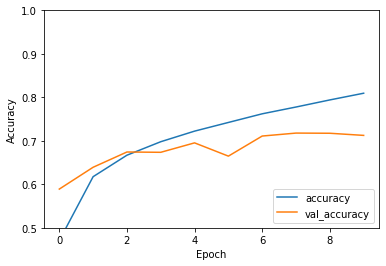

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [ ]:
test_loss, test_acc = first_model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.9028 - accuracy: 0.7125
0.7124999761581421


On peut sauvgarder notre modèle localement en utilisant la fonction save de Keras.  Il faut alors préciser le nom du modèle qu'on va sauvgarder au format de fichier .h5

In [ ]:
first_model.save("first_model.h5")

On peut alors, pour visualiser notre modèle de manière efficace utiliser l'application web Netron, qui a été développée par Lutz Roeder disponible à l'adresse suivante : <br>
https://netron.app/

Vous pouvez alors télécharger le modèle que vous avez sauvgardé sur collab sur votre machine. <br>
Ensuite vous pourrez fournir le fichier .h5 de votre modèle à l'application pour visualiser votre architecture. <br>
Cette application fournit un outil de visualisation complet du réseau de neurones

<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/first_model.h5.png?raw=1">

Voici l'image qu'on obtient avec le réseau de neurones que nous venons de construire.



# <a id="sec3">3. Etude d'architectures de CNN classiques</a>

Après avoir introduit les différents paramètres nécessaires à la construction d'une architecture de réseaux de neurones convolutifs et construit nous même une architecture, on va désormais discuter des architectures classiques qui ont été introduites au fil des années. 
 

<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/CNN_timeline.png?raw=1">

L'image suivante montre une chronologie des architectures de CNN notables.

# 1) Le réseau de neurones LeNet 

C'est une des premières architectures de réseau de neurones convolutives qui a été introduite par Yann LeCun et al. [2] en 1998. Ce réseau a été concu dans le but principal de reconnaitre des chiffres écrits à la main et des codes postaux 

En suivant la légende ci dessous <br>
<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/architecture_legende.png?raw=1">

On peut représenter l'architecture LeNet avec le schéma suivant : 

<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/LeNet5.PNG?raw=1">

Exercice : <br>
En utilisant keras, créer l'architecture de réseau de neurones convolutifs correspondant à l'architecture de LeNet5 : 

In [ ]:
## Votre code ici : 

"""
def LeNet5():
A compléter 
"""

# correction

In [ ]:
## correction décommentez la ligne suivante pour voir la solution 
"""def LeNet5():
  modelLN5 = models.Sequential()

  conv1 = layers.Conv2D(6,kernel_size=(5,5),strides=(1,1),padding='valid',activation='tanh',input_shape=(32,32,1))
  modelLN5.add(conv1)

  pool1 = layers.AveragePooling2D((2,2),strides=(2,2),padding='valid')
  modelLN5.add(pool1)

  conv2 = layers.Conv2D(16,kernel_size=(5,5),strides=(1,1),padding='valid',activation='tanh')
  modelLN5.add(conv2)

  pool2 = layers.AveragePooling2D((2,2),strides=(2,2),padding='valid')
  modelLN5.add(pool2)

  modelLN5.add(layers.Flatten())

  modelLN5.add(layers.Dense(120,activation='tanh'))
  modelLN5.add(layers.Dense(84,activation='tanh'))
  modelLN5.add(layers.Dense(10,activation='softmax'))

  modelLN5.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

  return modelLN5 
"""

# suite

In [ ]:
LN5 = LeNet5()

LN5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_110 (Conv2D)          (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_11 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_12 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_11 (Dense)             (None, 84)               

on peut aussi visualiser le réseau LeNet5 à l'aide du module Netron en suivant la même démarche décrite à la fin de la partie II 2.3) 

In [ ]:
LN5.save("LeNet5.h5")

<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/LeNet5.h5.png?raw=1">

# 2) AlexNet :


Ce réseau de neurones convolutif, introduit en 2012, était le premier à vraiment populariser les réseaux de neurones convolutifs, notamment en étant le premier de son genre à gagner la compétition ImageNet ILSVRC. Il a surclassé de 10% (en terme d'erreur de classification) le deuxième finaliste de la compétition

L'erreur de classification est étudiée selon les critère de top-5.<br> 
Dans le cadre de la compétition ImageNet il existe 1000 classes différentes et on doit classifier les images.<br>
La sortie du réseau de neurones fournit un vecteur de probabilités 
tel que $\sum_{i \in [1,1000]} p_i  = 1$.<br> L'erreur top 5 correspond à déterminer si parmi les 5 classes les plus probables que notre réseau prédit, on peut trouver la classe correcte.
L'erreur top 1 correspond à déterminer si la classe la plus probable est la classe correcte de l'image. 

<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/imageNetwinners.jpeg?raw=1">

<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/alexnet_article.png?raw=1">

Dans le schéma d'architecture proposé il est important de préciser que l'entrainement du réseau a été effectué par deux GPU en parallèle. 


Pour réduire le surapprentissage au niveau des couches entièrement connectées deux couches de dropout avec une probabilité de 0.5 ont été rajoutées entre les deux premières couches FC. 

Une normalisation des paramètres  a également été appliquée pour les deux premières couches convolutives. 

On propose ci dessous une implémentation de cette architecture avec Keras : 

In [ ]:
def AlexNet():
  alex = models.Sequential()

  conv1 = layers.Conv2D(96,(11,11),(4,4),activation='relu',input_shape=(224,224,3))
  alex.add(conv1)

  pool1 = layers.MaxPooling2D(pool_size=(3,3),strides=(2,2))
  alex.add(pool1)
  alex.add(layers.BatchNormalization())

  conv2 = layers.Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu')
  alex.add(conv2)

  pool2 = layers.MaxPooling2D(pool_size=(3,3),strides=(2,2))
  alex.add(pool2)
  alex.add(layers.BatchNormalization())

  conv3 = layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")
  conv4 = layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")
  conv5 = layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")

  alex.add(conv3)
  alex.add(conv4)
  alex.add(conv5)

  pool3 = layers.MaxPooling2D(pool_size=(3,3),strides=(2,2))
  alex.add(pool3)

  alex.add(layers.Flatten())
  alex.add(layers.Dense(4096,activation='relu'))
  alex.add(layers.Dropout(0.5))
  alex.add(layers.Dense(4096,activation='relu'))
  alex.add(layers.Dropout(0.5))
  alex.add(layers.Dense(1000,activation='softmax'))

  return alex

In [ ]:
Alex = AlexNet()
Alex.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_112 (Conv2D)          (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization_98 (Batc (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
batch_normalization_99 (Batc (None, 12, 12, 256)       1024      
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 12, 12, 384)      

# ZFNet :

C'est le réseau de neurones convolutif qui a gagné la compétition organisée par ImageNet en 2013 un an après AlexNet. Le réseau utilisé s'inspire d'AlexNet et propose des hyperparamètres différents, qui ont permis d'améliorer la précision du modèle.  

<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/imageNetwinners.jpeg?raw=1">

Les hyperparamètres qui ont été modifiés sont : 
- Dans la première couche la taille des filtres a été réduite ainsi que le pas, de (11,11) avec un stride de 4 vers une taille de (7,7) et un stride de  2
- Dans les couches convolutives 3,4,5 la nombre de filtre utilisé est passé respectivement de 384,384 et 256 à 512,1024 et 512

# 3) VGGNet

Le réseau VGGNet, qui a été le second finaliste de l'édition 2014 innove par rapport aux réseaux précedemment utilisés par la gain en profondeur des couches utilisées et la réduction de la taille des filtres utilisés.<br> Il réussit à améliorer encore plus la performance avec un taux d'erreur top 5 de 7%

<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/vggnet.PNG?raw=1">

On peut à l'aide de Keras importer cette architecture et même utiliser les poids utilisés lors de la compétition imagenet 

In [ ]:
VGGNet = VGG16(weights='imagenet')

On peut ensuite voir la composition du modèle : 


In [ ]:
VGGNet.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Le fait d'utiliser des filtres de taille réduite mais avec plus de couches convolutives permet garder une grande "visibilité" des entrées tout en diminuant le nombre de paramètres à entraîner (voir section Architecture des réseaux de neurones convolutifs) 

Ce réseau démontre qu'on obtient en général des meilleurs résultats en utilisant des réseaux plus profonds.

On remarque que les couches entièrement connectées représentent plus de 85% des paramètres entrainables . 

# 4) GoogleNet

Le gagnant de l'édition 2014 de la compétition ImageNet. <br> Ce réseau introduit le module d'inception. <br>
<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/tenor.gif?raw=1">

Cela consiste à constuire une topologie locale qu'on va empiler succéssivement. La topologie proposée existe en deux versions : 

<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/niave_inception_module.PNG?raw=1">

Il s'agit ici de la version naïve. Dans cette version on applique à la couche d'entrée 4 filtres en parallèle et on va ensuite concaténer ces résultats. 
Le problème dans cette méthode provient du nombre très grand d'opérations à effectuer. <br>
En effet, supposons que l'entrée soit de taille $W_{in} = (28,28,256)$
Les couches auront un nombre de filtres convolutifs respectif $n_1 = 128, n_2 =192, n_3 = 96 $ et Le nombre d'opérations produit par le filtre $N_{OP}$ sera  égal à <br> $N_{OP} = 128*28*28*256 + 192*28*28*3*3*256 + 96*28*28*5*5*256 = 8.54*10^8 $ opérations de convolution à effectuer.

Pour cela, une topologie plus optimisée a été intorduite <br>
<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/inception_with_dimension_reduction.PNG?raw=1">


On applique, avant les filtres de taille supérieure à 3 une convolution préliminaire qui consiste à réduire le nombre de canaux.
<br>
<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/reduced_inception_module.PNG?raw=1
">

 Ainsi on passe de $N_{OP} = 8.54*10^8 $ opérations à $N_{OP}=3.58*10^8$ opérations 

Un des principaux avantages de ce réseau est l'utilisation moindre de couches FC qui contiennent un très grand nombre de paramètres à entraîner.

# 5) ResNet 

Le réseau ResNet introduit en lors de l'édition 2015 de la compétition propose une architecture qui innove par la très grande profondeur des couches, avec plus de 152 couches utilisées par le réseau.

En général un réseau avec plus de couches est plus difficile à entrainer et à optimiser. Cela provient à cause du problème du gradient évanescent <br>
<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/diff_layer_error.png?raw=1">

De ce fait le réseau ResNet introduit la possibilité de "sauter" certaines couches. <br>
<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/residual.PNG?raw=1">

De ce fait on se donne comme objectif d'ajuster le résidu $F(x) = H(x)-x$ au lieu d'ajuster seulement $H(x)$

Cela permet alors d'entrainer efficacement des réseaux de neurones convoluitifs avec un très grand nombre de couches et les résultats ont été très impressionnants. 
De ce fait, ces réseaux sont maintenant utilisés comme réference dans la détection d'objet et la classification d'images.

Keras permet également d'importer ce modèle avec les hyperparamètres qui ont été utilisés pour la compétition ImageNet

In [ ]:
ResNet = ResNet50(weights="imagenet")

In [ ]:
ResNet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_17[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

On observe donc qu'on a un très grand nombre de couche mais un nombre de paramètre qui est bien plus petit que l'architecture AlexNet par exemple.

# <a id="sec4">4. Comparaison de la performance des architectures </a>

Pour comparer la performance des architectures nous allons introduire plusieurs cirtères.<br>
[4] Introduit premièrement la précision top 1 du réseau pour la classification. <br>


<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/comp_top1.PNG?raw=1">

Les réseaux les plus performants au moment de la comparaison sont Inception-v4 Inception-v3 et ResNet-152.<br>

Inception-v4 et Inception-v3 proviennent de la combinaison des techniques d'inception utilisés par GoogLeNet et l'introduction de la couche résiduelle introduite par ResNet 

Cependant cette comparaison ne prend pas en compte le coût calculatoire que chaque réseau nécessite, ni le nombre de paramètres utilisés.<br>
Ce qui peut être, pour certains utilisateurs, des variables décisionelle impportantes. 
La figure suivante montre un comparatif établi cette fois ci en prenant en compte le nombre d'opérations qui sont effectuées pour une opération forward, et le nombre de paramètres du réseau<br>
<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/2_param_comp.PNG?raw=1">

La taille des "blobs" représente le nombre de paramètres à entrainer du réseau convolutif.

VGG est le réseau qui présente le plus de paramètres et le plus grand nombre d'opération effectuées par opération forward.

On observe que GoogLeNet est le réseau le plus efficace en prenant en compte ces 3 critères car il offre un très bon compromis entre précision satisfaisante et modèle assez léger.

Pour choisir une architecture de réseau de neurones convolutifs ils faut donc prendre en compte plusieurs critères et choisir le réseau qui s'adapte le plus à nos besoins. 

# Perspectives et évolutions: 

<image src="https://github.com/Gabriel2103/CNNArchitectures/blob/master/img/imageNetwinners.jpeg?raw=1">

Comme la figure ci dessous nous l'indique les réseaux les plus récents surpassent l'humain dans la précision de classification d'images ! 

Un des enjeux majeurs dans la conception des architectures de réseaux de neurones convolutifs est d'optimiser la mémoire utilisée ainsi que le nombre de paramètres à entrainer. 


Les performances des réseaux convolutifs sont désormais testés au cours de compétitions en ligne. La compétition organisée par ImageNet n'éxiste plus depuis 2017 mais de nombreuses compétitions sur Kaggle notamment peuvent servir pour tester l'éfficacité d'un réseau de neurones convolutif.

# Exemple applicatif

Dans cet exemple l'utilisateur pourra utiliser les architectures de réseaux de neurones convolutifs disponibles dans le module keras pour prédire la classification d'une image de son choix. Vous pouvez comparer la performance des différents réseaux sur vos images. <br>
L'ensemble des modules disponibles se trouve sur la page suivante : https://keras.io/api/applications/

Vous devez d'abord mettre sur google Colab l'image ou les images que vous voudriez tester en éxecutant la cellule suivante :

In [ ]:
uploaded = files.upload()

In [ ]:
def predict_image_class(image_path,input_size,model):
  """
  Draws and predicts a class for a given image 
  Params
  ------
  image_path, str : the of the image
  
  input_size, tuple : the desired input size of the CNN model used
    ex : if the model expects a (224,224,3) input size then input_size=(224,224)

  model : the model used to predict the classes 

  Returns
  -------
  The image with a legend underneath that tells the user the class predicted and the probability
  """
  
  img = image.load_img(img_path,target_size=input_size)
  img_arr = image.img_to_array(img)
  img_arr = img_arr/255
  img_arr = np.expand_dims(img_arr,axis=0)
  preds = model.predict(img_arr)
  #print("predicting with model : {}".format(model.name))
  plt.figure(figsize=(10,10))
  plt.imshow(img_arr.reshape(*input_size,3))
  plt.xlabel(decode_predictions(preds,top=1)[0][0][1:])

In [ ]:
model = InceptionV3(weights='imagenet') # choisissez le modèle à utiliser (voir ceux disponibles depuis la section 0.)
image_path = "" # à remplir par l'utilisateur  
input_size =  # à remplir par l'utilisateur 

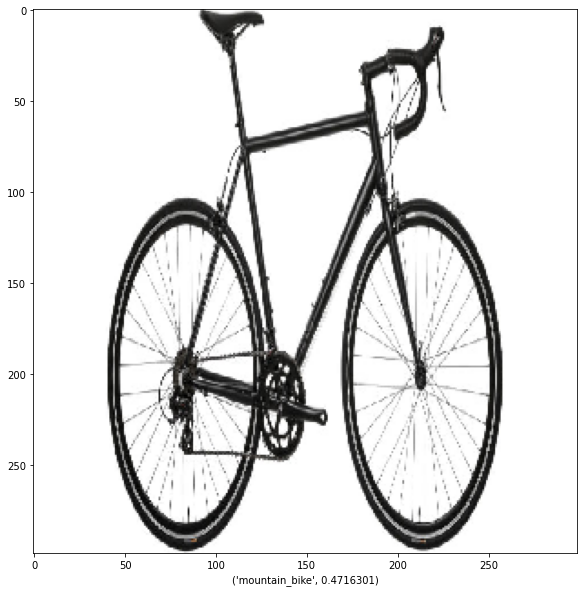

In [ ]:
predict_image_class(img_path,input_size,model)

# <a id="sec5">5. Références bibliographiques</a>

[1] Comparison of CNN architectures : https://cs231n.github.io/convolutional-networks/ <br>
[2] Gradient Based Learning Applied to document recognition http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf <br>
[3] ImageNet Classification with Deep Convolutional
Neural Networks Alex Krizhevsky et al. https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf <br>
[4] An Analysis of Deep Neural Networks Models For Practical Applications https://arxiv.org/pdf/1605.07678.pdf <br>
[5] Stanford lecture 9 slides http://cs231n.stanford.edu/slides/2020/lecture_9.pdf<br>
[6] Deep Residual Learning for Image Recognition https://arxiv.org/pdf/1512.03385.pdf <br>
[7] Going Deeper with Convolutions https://arxiv.org/pdf/1409.4842.pdf